In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from scavenger import criterion

np.random.seed(0) # Also sets seed for pandas
sns.set_theme(style="whitegrid")

data_dir = "./output"
data_path = Path(data_dir) / "results.csv"

In [2]:
df = pd.read_csv(str(data_path))
df.head(10)

,doc_id,AllDocuments,Domain,QuestionAnswerStrings,FullyStructured,ExamStrings,QuestionStrings,StringsMatch,preview
0,data_0,True,False,False,False,False,True,False,Catalonia election: Puigdemont calls for talks...
1,data_1,True,False,False,False,False,False,False,"Wirex, a prominent UK’s FCA supported cryptocu..."
2,data_2,True,False,False,False,False,False,False,"Effect of sleep quality on memory, executive f..."
3,data_3,True,False,False,False,False,False,False,"### Solution for ""Download of Code Without Int..."
4,data_4,True,False,False,False,False,False,False,Fluorescent labeling of both GABAergic and gly...
5,data_5,True,False,True,False,False,True,False,Q:How to avoid anti-clockwise rotation animati...
6,data_6,True,False,False,False,False,False,False,"Carotid endarterectomy: operative risks, recur..."
7,data_7,True,False,False,False,False,False,False,Regulation of the anaerobic metabolism in Baci...
8,data_8,True,False,True,False,False,True,False,Q:ReCAPTCHA v3 is not working in a Shopify Con...
9,data_9,True,False,False,False,False,False,False,Early and long-term outcomes after manual and ...


,criteria,counts
0,AllDocuments,1000.0
1,QuestionStrings,183.0
2,QuestionAnswerStrings,135.0
3,ExamStrings,10.0
4,FullyStructured,2.0
5,StringsMatch,2.0
6,Domain,0.0


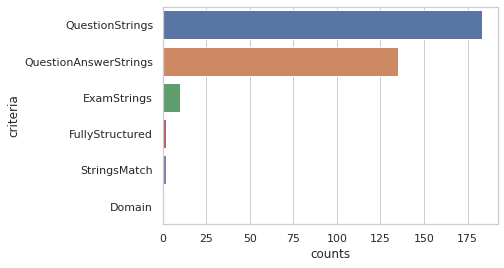

In [3]:
df_criteria = df.select_dtypes(include=bool)
# Get counts for each criterion
criteria_counts = df_criteria.apply(pd.value_counts).loc[True]
criteria_counts.fillna(0, inplace=True)
criteria_counts.sort_values(ascending=False, inplace=True)
df_counts = pd.DataFrame({
    "criteria": criteria_counts.index,
    "counts": criteria_counts.values,
})

display(df_counts)
ax = sns.barplot(x="counts", y="criteria", data=df_counts[df_counts.criteria != "AllDocuments"])